<a href="https://colab.research.google.com/github/Ananya-S-Krishna/EV-Charging-Time-Predictor/blob/main/EV_Charging_Time_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()

Saving Session_data.xlsx to Session_data.xlsx


In [ ]:
# Step 2: Read the Excel file
import pandas as pd

df = pd.read_excel("Session_data.xlsx")
print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,Session,CCS,Arrival,Departure,Stay (min),Energy (Wh),Pmax (W),Preq_max (W),"Controlled session (0=False, 1=True)",TotalCapacity,BulkCapacity,SOC arrival,SOC departure,Energy capacity (Wh)
0,278,CCS1,2022-08-11 23:33:00,2022-08-11 23:37:00,5,9632.0,168393,192417,1,79140,63312,25.999495,35.999495,91504.000000
1,897,CCS1,2023-04-22 09:46:00,2023-04-22 09:50:00,5,3993.0,87201,192417,1,75200,60160,45.000000,49.000000,94833.750000
2,958,CCS1,2023-05-18 13:24:00,2023-05-18 13:28:00,5,4567.0,79593,252297,1,10000,8000,21.000000,27.000000,72310.833333
3,1046,CCS1,2023-06-18 16:14:00,2023-06-18 16:18:00,5,5591.0,120198,232965,1,10000,8000,46.990000,55.000000,66310.237203
4,1095,CCS1,2023-06-28 14:39:00,2023-06-28 14:43:00,5,6400.0,128517,353265,1,10000,8000,45.000000,54.000000,67555.555556


In [ ]:
# Select relevant columns
selected_cols = ['SOC arrival', 'SOC departure', 'Energy capacity (Wh)', 'Preq_max (W)', 'Stay (min)']
data = df[selected_cols].copy()

# Clean & drop missing values
data.dropna(inplace=True)

# Add new feature - SOC Delta (how much charge was added)
data['SOC delta'] = data['SOC departure'] - data['SOC arrival']

# Rename target column
data.rename(columns={'Stay (min)': 'Charging Time (min)'}, inplace=True)

print("Cleaned data:")
data.head()

Cleaned data:


,SOC arrival,SOC departure,Energy capacity (Wh),Preq_max (W),Charging Time (min),SOC delta
0,25.999495,35.999495,91504.000000,192417,5,10.00
1,45.000000,49.000000,94833.750000,192417,5,4.00
2,21.000000,27.000000,72310.833333,252297,5,6.00
3,46.990000,55.000000,66310.237203,232965,5,8.01
4,45.000000,54.000000,67555.555556,353265,5,9.00


In [ ]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define input features and target
features = ['SOC arrival', 'SOC delta', 'Energy capacity (Wh)', 'Preq_max (W)']
target = 'Charging Time (min)'

X = data[features]
y = data[target]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model trained successfully")
print(f"MAE:  {mae:.2f} min")
print(f"RMSE: {rmse:.2f} min")
print(f"R²:   {r2:.2f}")

Model trained successfully
MAE:  5.96 min
RMSE: 8.84 min
R²:   0.75


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


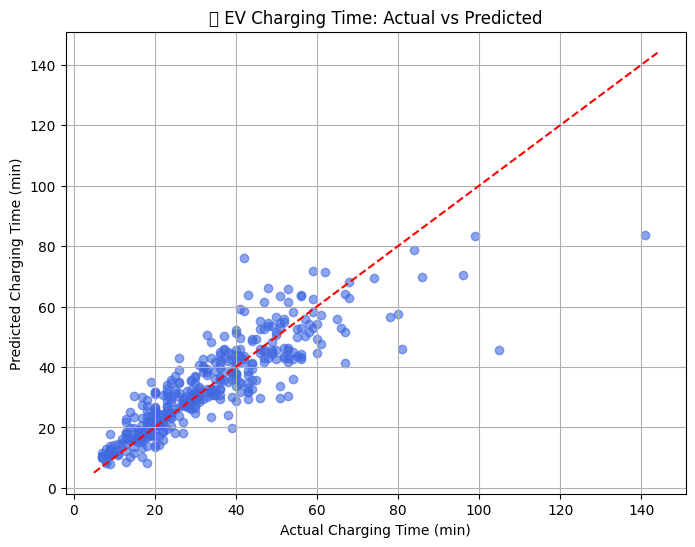

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # y=x line
plt.xlabel("Actual Charging Time (min)")
plt.ylabel("Predicted Charging Time (min)")
plt.title("🔌 EV Charging Time: Actual vs Predicted")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


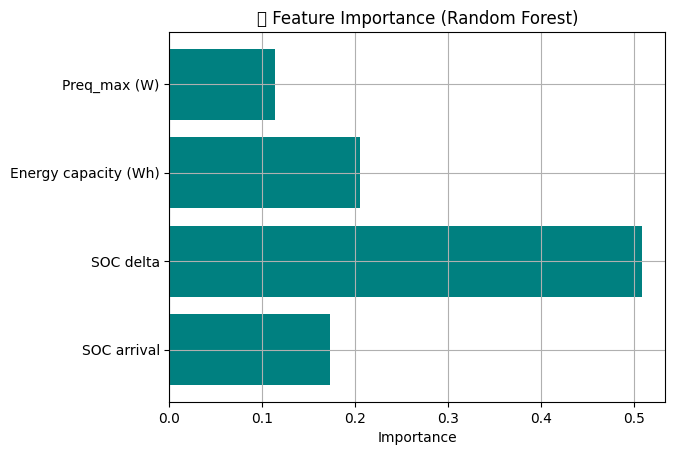

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances, color='teal')
plt.xlabel("Importance")
plt.title("🔧 Feature Importance (Random Forest)")
plt.grid(True)
plt.show()